<font face="黑体" size=3><center>姓名：徐子杰</center>
<font face="黑体" size=3><center>学号：2016302010098</center>
<font face="黑体" size=3><center>专业：数理金融</center>

### 1.

根据欧拉方程与消费约束
$$\begin{aligned}\frac{c_{t+1}}{c_t} &= \beta [\alpha  k_{t+1}^{\alpha-1} + (1-\delta)]\end{aligned}$$
$$\begin{aligned}c_t+k_{t+1} -(1-\delta)k_t &= k_t^{\alpha}\end{aligned}$$

与已有数据计算出下列数据:

In [1]:
delta, alpha, beta = 0.05, 0.3, 0.95
k_ss = ((1/beta-1+delta)/alpha)**(1/(alpha-1))
k_0 = k_ss/2
k_max = (1/delta)**(1/(1-alpha))
k_G = (alpha/delta)**(1/(1-alpha))

并定义一个$\begin{aligned}\dot{k}=0\end{aligned}$的函数css:

In [2]:
def css(k):
    return k**alpha-delta*k
c_ss = css(k_ss)
c_max = css(k_G)

在已有$k_{ss}$与$c_{ss}$的情况下通过将$k_t^{\alpha}$进行泰勒展开得到$k_t^{\alpha}=k_{ss}^{\alpha}+\alpha*k_{ss}^{\alpha-1}*(k_t-k_{ss})$,得到公式
$$\begin{aligned}
c_t=\frac{c_{t+1}}{\beta*((1-\delta)+\alpha*k_{t+1}^{\alpha-1})}
\end{aligned}$$
$$\begin{aligned}
k_t=\frac{c_t+k_{t+1}+(\alpha-1)*k_{ss}^{\alpha}}{\alpha*k_{ss}^{\alpha-1}+(1-\delta)}
\end{aligned}$$

因此可以定义一个进行backward shooting的函数:

In [3]:
import numpy as np
def backward(n=200):
    c = np.zeros((n, 1))
    k = np.zeros((n, 1))
    c[n-1] = c_ss
    k[n-1] = k_ss-0.001     # 让c_t+1与c_t的比值略大于1
    for i in range(n-1, 0, -1):
        c[i-1] = c[i]/(beta*((1-delta)+alpha*k[i]**(alpha-1)))
        k[i-1] = (c[i-1]+k[i]+(alpha-1)*k_ss**alpha)/(alpha*k_ss**(alpha-1)+(1-delta))
        if k[i-1] <= k_0:   
            c = c[i-1:]
            k = k[i-1:]     # 选取非零的有效期数
            break
    return k, c

In [4]:
k_back, c_back = backward()

这样就得到了收敛于均衡点的序列，通过定义一个画图函数来作图：

In [5]:
import matplotlib.pyplot as plt
def plot_func(k, c, title):
    fig, ax = plt.subplots()
    plt.xlim((0, k_max))
    plt.ylim((0, 1.5*c_max))
    k_simulation = np.linspace(0, k_max, 500)
    ax.plot(k_simulation, css(k_simulation), label ='$\dotk=0$', linestyle = '-.')
    plt.axvline(x = k_ss, ymin = 0, ymax = 1.5*c_max, label = '$\dotc=0$', linestyle = '-')
    plt.axvline(x = k_0, ymin = 0 ,ymax = 1.5*c_max, label = '$k_0$', linestyle = ':')
    ax.plot(k, c, label = "stable saddle path", linewidth = 2, linestyle = '--')
    ax.legend(loc = "upper right")
    ax.set_title(title, fontsize = 20, fontweight = 'heavy')
    plt.show()

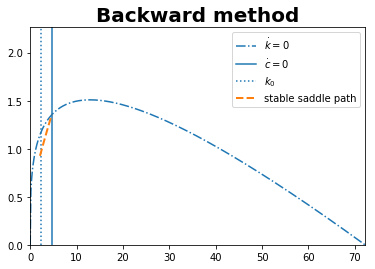

In [6]:
plot_func(k_back, c_back, 'Backward method')

c_back的长度为75期，即通过了75期从初始状态收敛到稳定状态。

求出数据$\frac{k_t}{y_t}$与$\ln(\frac{k_t}{y_t})-1$

In [7]:
sr = k_back/c_back
lsr = np.log(sr)-1

In [8]:
lsr.reshape(1, 75)

array([[-0.17475736, -0.09967009, -0.04331616,  0.00045957,  0.03532862,
         0.06363646,  0.08696127,  0.10640909,  0.12278092,  0.13667275,
         0.14853816,  0.15872902,  0.16752282,  0.1751415 ,  0.18176478,
         0.18753975,  0.19258796,  0.19701069,  0.20089294,  0.20430652,
         0.20731246,  0.20996286,  0.21230244,  0.21436973,  0.21619804,
         0.21781624,  0.21924947,  0.22051965,  0.22164594,  0.2226451 ,
         0.22353186,  0.22431917,  0.22501839,  0.22563958,  0.22619158,
         0.22668221,  0.22711838,  0.2275062 ,  0.22785109,  0.22815783,
         0.22843068,  0.2286734 ,  0.22888933,  0.22908144,  0.22925236,
         0.22940443,  0.22953971,  0.22966005,  0.22976708,  0.22986226,
         0.22994687,  0.23002206,  0.23008882,  0.23014807,  0.23020059,
         0.23024707,  0.23028813,  0.23032431,  0.23035606,  0.2303838 ,
         0.23040787,  0.23042855,  0.23044608,  0.23046064,  0.23047237,
         0.23048136,  0.23048763,  0.23049117,  0.2

注意到lsr在后期几乎稳定在0.23左右，即该增长率在稳定状态是一个定值，拥有稳定增长的特性。

### 2.

欧拉方程与消费约束为
$$\begin{aligned}\frac{c_{t+1}-\bar{c}}{c_t-\bar{c}} &= \beta [\alpha  k_{t+1}^{\alpha-1} + (1-\delta)]\end{aligned}$$
$$\begin{aligned}c_t+k_{t+1} -(1-\delta)k_t &= k_t^{\alpha}\end{aligned}$$

利用forward shooting解决该问题的思路为给定$k_0$并通过改变$c_0$的值并通过公式:

$$\begin{aligned}k_{t+1}=(1-\delta)*k_t+k_t^{\alpha}-c_t\end{aligned}$$
$$\begin{aligned}c_{t+1}=\beta*(c_t-\bar{c})*((1-\delta)+\alpha*k_{t+1}^{\alpha-1})+\bar{c}\end{aligned}$$

来获得增长路径，并判断这些增长路径是否趋近于一个稳态。

定义一个forward shotting的函数:

In [9]:
def forward(c_0, n=200):
    c_bar = 1
    c = np.zeros((n, 1))
    k = np.zeros((n, 1))
    c[0] = c_0
    k[0] = k_0
    for i in range(n-1):
        k[i+1] = k[i]**alpha+(1-delta)*k[i]-c[i]
        c[i+1] = (c[i]-c_bar)*beta*((1-delta)+alpha*k[i+1]**(alpha-1))+c_bar
        if k[i+1]<=0:
            k[i+1]=0
            break
    return k, c

以及一个进行二分法的函数：

In [10]:
def bisection():
    c_bar = 1
    c0_min = c_bar
    c0_max = c_max
    while c0_max-c0_min>10**(-10):
        c0=(c0_min+c0_max)/2
        k_simu, c_simu = forward(c0)
        if k_simu[-1] <= k_ss:
            c0_max = c0
        else:
            c0_min = c0
    return k_simu, c_simu

In [11]:
k_forw, c_forw = bisection()

D:\anaconda\envs\virtualenvironment\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


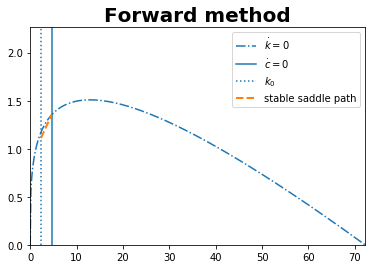

In [12]:
plot_func(k_forw, c_forw, 'Forward method')

可以明显看出stable saddle path在第一问中的结果的上方

其中初始状态的$c_0$为

In [13]:
c_forw[0]

array([1.11045318])

In [19]:
sr_b = k_forw/c_forw
lsr_b = np.log(sr_b)-1

In [21]:
lsr_b.reshape(1, 200)

array([[-0.26557709, -0.2456988 , -0.22626672, -0.20731581, -0.18887458,
        -0.17096554, -0.15360562, -0.13680664, -0.12057587, -0.1049165 ,
        -0.08982813, -0.07530725, -0.06134768, -0.04794098, -0.03507683,
        -0.02274333, -0.01092737,  0.00038516,  0.01120911,  0.02155984,
         0.0314531 ,  0.04090482,  0.04993098,  0.05854756,  0.06677036,
         0.074615  ,  0.08209681,  0.0892308 ,  0.0960316 ,  0.10251346,
         0.1086902 ,  0.11457519,  0.12018139,  0.12552127,  0.13060685,
         0.13544971,  0.14006098,  0.14445132,  0.14863098,  0.15260977,
         0.15639709,  0.16000195,  0.16343293,  0.16669827,  0.16980582,
         0.17276309,  0.17557725,  0.17825512,  0.18080323,  0.18322781,
         0.18553479,  0.18772982,  0.18981829,  0.19180534,  0.19369586,
         0.19549452,  0.19720576,  0.1988338 ,  0.20038268,  0.20185622,
         0.20325808,  0.20459174,  0.20586051,  0.20706752,  0.20821579,
         0.20930817,  0.21034736,  0.21133597,  0.2

当时间到达第18期时才开始增长，而第一问中第四期便开始增长。

当时间到达第122期时，$k_t$大于4.62，因此可以认为第二问比第一问收敛地慢。可能的原因是forward shooting所找到的收敛路径会比backward shooting找到的路径与真实路径的区别更大。附上python代码的整合：

In [ ]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt


delta, alpha, beta = 0.05, 0.3, 0.95
k_ss = ((1/beta-1+delta)/alpha)**(1/(alpha-1))
k_0 = k_ss/2
k_max = (1/delta)**(1/(1-alpha))
k_G = (alpha/delta)**(1/(1-alpha))

def css(k):
    return k**alpha-delta*k
c_ss = css(k_ss)
c_max = css(k_G)

class Solution:
    @staticmethod
    def backward(n=200):
        c = np.zeros((n, 1))
        k = np.zeros((n, 1))
        c[n-1] = c_ss
        k[n-1] = k_ss-0.001     # 让C_t+1与C_t的比值略大于1
        for i in range(n-1, 0, -1):
            c[i-1] = c[i]/(beta*((1-delta)+alpha*k[i]**(alpha-1)))
            k[i-1] = (c[i-1]+k[i]+(alpha-1)*k_ss**alpha)/(alpha*k_ss**(alpha-1)+(1-delta))
            if k[i-1] <= k_0:
                c = c[i-1:]
                k = k[i-1:]     # 选取非零的有效期数
                break
        return k, c


    @staticmethod
    def forward(c_0, n=200):
        c_bar = 1
        c = np.zeros((n, 1))
        k = np.zeros((n, 1))
        c[0] = c_0
        k[0] = k_0
        for i in range(n-1):
            k[i+1] = k[i]**alpha+(1-delta)*k[i]-c[i]
            c[i+1] = (c[i]-c_bar)*beta*((1-delta)+alpha*k[i+1]**(alpha-1))+c_bar
            if k[i+1]<=0:
                k[i+1]=0
                break
        return k, c

    @staticmethod
    def bisection():
        c_bar = 1
        c0_min = c_bar
        c0_max = c_max
        while c0_max-c0_min>10**(-10):
            c0=(c0_min+c0_max)/2
            k_simu, c_simu = Solution.forward(c0)
            if k_simu[-1] <= k_ss:
                c0_max = c0
            else:
                c0_min = c0
        return k_simu, c_simu



    @staticmethod
    def plot(k, c, title):
        fig, ax = plt.subplots()
        plt.xlim((0, k_max))
        plt.ylim((0, 1.5*c_max))
        k_simulation = np.linspace(0, k_max, 500)
        ax.plot(k_simulation, css(k_simulation), label ='$\dotk=0$', linestyle = '-.')
        plt.axvline(x = k_ss, ymin = 0, ymax = 1.5*c_max, label = '$\dotc=0$', linestyle = '-')
        plt.axvline(x = k_0, ymin = 0 ,ymax = 1.5*c_max, label = '$k_0$', linestyle = ':')
        ax.plot(k, c, label = "stable saddle path", linewidth = 2, linestyle = '--')
        ax.legend(loc = "upper right")
        ax.set_title(title, fontsize = 20, fontweight = 'heavy')
        plt.show()

if __name__ == '__main__':
    s = Solution
    k_back, c_back = s.backward()
    s.plot(k_back, c_back, 'Backward method')
    k_forward, c_forward = s.bisection()
    s.plot(k_forward, c_forward, 'Forward method')
